## PROGRAM MADM AHP (ANALYTICAL HIERACHY PROCESS) DALAM BAHASA PYTHON

### Deskripsi Masalah

Manajer pembelian Suroboyo Bus bertanggung jawab untuk memutuskan perusahaan mana yang tersedia untuk membeli 50 bus untuk rute baru. Setelah studi kelayakan awal dan analisis merek, model beberapa bus, dan proses yang terkait dengan pembelian, ia mempersempit daftar alternatif keputusannya menjadi tiga opsi;
1. **Proyek 1**: Pembelian model Eksekutif,
2. **Proyek 2**: Pembelian model Medium, dan
3. **Proyek 3**: Pembelian model Ekonomi.

Suroboyo Bus memutuskan bahwa kriteria berikut relevan untuk proses keputusan pembeliannya:
1. **Mil per galon (MPG)**
2. **Kenyamanan**
3. **Gaya**
4. **Harga**

### Mengimport libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Tabel 1: Penilaian Verbal ke Peringkat Numerik

In [2]:
Rating_dic = {'Tingkat Kepentingan': ['Mutlak lebih penting','Sangat lebih penting hingga mutlak lebih penting',
                                       'Sangat lebih penting','Lebih penting hingga sangat lebih penting',
                                      'Lebih penting','Cukup penting hingga lebih penting',
                                     'Cukup penting', 'Sama penting hingga cukup penting','Sama penting' ],
                 'Peringkat Numerik': [9,8,7,6,5,4,3,2,1]}

Rating_comparison = pd.DataFrame(Rating_dic).set_index('Tingkat Kepentingan')
Rating_comparison

,Peringkat Numerik
Tingkat Kepentingan,
Mutlak lebih penting,9
Sangat lebih penting hingga mutlak lebih penting,8
Sangat lebih penting,7
Lebih penting hingga sangat lebih penting,6
Lebih penting,5
Cukup penting hingga lebih penting,4
Cukup penting,3
Sama penting hingga cukup penting,2
Sama penting,1


### Tabel 2: Perbandingan Berpasangan Empat Kriteria Soal Pemilihan Bus

In [3]:
comparison_dic = {'Perbandingan Berpasangan': ['Harga-MPG','Harga-Kenyamanan','Harga-Gaya','MPG-Kenyamanan','MPG-Gaya','Kenyamanan-Gaya'],
                 'Kriteria Terpenting': ['Harga','Harga','Harga','Kenyamanan','Gaya','Gaya'],
                 'Seberapa Penting': ['Cukup penting','Sama penting hingga cukup penting','Sama penting hingga cukup penting','Cukup penting hingga lebih penting','Cukup penting hingga lebih penting','Sama penting hingga cukup penting'],
                 'Peringkat Numerik': [3,2,2,4,4,2]}

criteria_comparison = pd.DataFrame(comparison_dic).set_index('Perbandingan Berpasangan')
criteria_comparison

,Kriteria Terpenting,Seberapa Penting,Peringkat Numerik
Perbandingan Berpasangan,,,
Harga-MPG,Harga,Cukup penting,3
Harga-Kenyamanan,Harga,Sama penting hingga cukup penting,2
Harga-Gaya,Harga,Sama penting hingga cukup penting,2
MPG-Kenyamanan,Kenyamanan,Cukup penting hingga lebih penting,4
MPG-Gaya,Gaya,Cukup penting hingga lebih penting,4
Kenyamanan-Gaya,Gaya,Sama penting hingga cukup penting,2


**Konversi Penilaian Verbal ke Peringkat Numerik**

In [4]:
Numeric_dic = {'Perbandingan Berpasangan': ['Harga','Kenyamanan','Gaya','MPG'],
                 'Harga': [1,1/2,1/2,1/3],
                 'Kenyamanan': [2,1,2,1/4],
                 'Gaya': [2,1/2,1,1/4],
                 'MPG': [3,4,4,1]}

Numeric_comparison = pd.DataFrame(Numeric_dic).set_index('Perbandingan Berpasangan')
Numeric_comparison

,Harga,Kenyamanan,Gaya,MPG
Perbandingan Berpasangan,,,,
Harga,1.000000,2.00,2.00,3
Kenyamanan,0.500000,1.00,0.50,4
Gaya,0.500000,2.00,1.00,4
MPG,0.333333,0.25,0.25,1


#### Menghitung bobot untuk setiap kriteria

In [5]:
criteria_weight = Numeric_comparison.copy()
for col in ['Harga','Kenyamanan','Gaya','MPG']:
    criteria_weight[col] = criteria_weight[col] / criteria_weight[col].sum()
criteria_weight

,Harga,Kenyamanan,Gaya,MPG
Perbandingan Berpasangan,,,,
Harga,0.428571,0.380952,0.533333,0.250000
Kenyamanan,0.214286,0.190476,0.133333,0.333333
Gaya,0.214286,0.380952,0.266667,0.333333
MPG,0.142857,0.047619,0.066667,0.083333


In [6]:
Price_weight = (criteria_weight['Harga'][0] + criteria_weight['Kenyamanan'][0] + criteria_weight['Gaya'][0] +criteria_weight['MPG'][0])/4
Comfort_weight = (criteria_weight['Harga'][1] + criteria_weight['Kenyamanan'][1] + criteria_weight['Gaya'][1] +criteria_weight['MPG'][1])/4
Style_weight = (criteria_weight['Harga'][2] + criteria_weight['Kenyamanan'][2] + criteria_weight['Gaya'][2] +criteria_weight['MPG'][2])/4
MPG_weight = (criteria_weight['Harga'][3] + criteria_weight['Kenyamanan'][3] + criteria_weight['Gaya'][3] +criteria_weight['MPG'][3])/4

In [7]:
print(f'Bobot Harga : {Price_weight:.3f}\nBobot Kenyamanan : {Comfort_weight:.3f}\nBobot Gaya : {Style_weight:.3f}\nBobot MPG : {MPG_weight:.3f}')

Bobot Harga : 0.398
Bobot Kenyamanan : 0.218
Bobot Gaya : 0.299
Bobot MPG : 0.085


Text(0, 0.5, 'Bobot Kriteria')

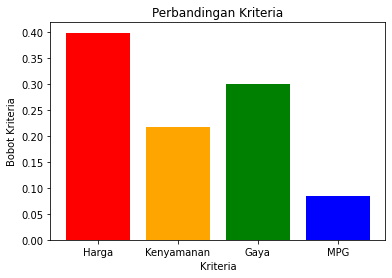

In [19]:
plt.bar(['Harga','Kenyamanan','Gaya','MPG'],[Price_weight, Comfort_weight, Style_weight, MPG_weight], color = ['red', 'orange', 'Green', 'blue'])
plt.title('Perbandingan Kriteria')
plt.xlabel('Kriteria')
plt.ylabel('Bobot Kriteria')

Hasil bobot di atas menunjukkan bahwa kriteria Harga merupakan kriteria yang paling penting dari semua kriteria, dengan bobot 0.398, disusul kriteria Gaya dengan bobot 0.299, disusul kriteria Kenyamanan dengan bobot 0.218, dan kriteria MPG dengan bobot 0.085

### Tabel 3: Perbandingan Berpasangan yang menunjukkan Preferensi untuk proyek berdasarkan kriteria

### Kriteria Harga

In [20]:
PRICE_dic = {'HARGA': ['Proyek 1','Proyek 2','Proyek 3'],
                 'Proyek 1': [1,3,4],
                 'Proyek 2': [1/3,1,2],
                 'Proyek 3': [1/4,1/2,1,]}

PRICE_comparison = pd.DataFrame(PRICE_dic).set_index('HARGA')
PRICE_comparison

,Proyek 1,Proyek 2,Proyek 3
HARGA,,,
Proyek 1,1,0.333333,0.25
Proyek 2,3,1.000000,0.50
Proyek 3,4,2.000000,1.00


In [21]:
PRICE_criteria = PRICE_comparison.copy()
for col in ['Proyek 1','Proyek 2','Proyek 3']:
    PRICE_criteria[col] = PRICE_criteria[col] / PRICE_criteria[col].sum()
PRICE_criteria

,Proyek 1,Proyek 2,Proyek 3
HARGA,,,
Proyek 1,0.125,0.1,0.142857
Proyek 2,0.375,0.3,0.285714
Proyek 3,0.500,0.6,0.571429


In [22]:
PRICE_P1 = (PRICE_criteria['Proyek 1'][0] + PRICE_criteria['Proyek 2'][0] + PRICE_criteria['Proyek 3'][0])/3
PRICE_P2 = (PRICE_criteria['Proyek 1'][1] + PRICE_criteria['Proyek 2'][1] + PRICE_criteria['Proyek 3'][1])/3
PRICE_P3 = (PRICE_criteria['Proyek 1'][2] + PRICE_criteria['Proyek 2'][2] + PRICE_criteria['Proyek 3'][2])/3

print(f'Bobot Proyek Berdasarkan Kriteria Harga\n--------------------------------------\nProyek 1 : {PRICE_P1:.3f}\nProyek 2: {PRICE_P2:.3f}\nProyek 3 : {PRICE_P3:.3f}')

Bobot Proyek Berdasarkan Kriteria Harga
--------------------------------------
Proyek 1 : 0.123
Proyek 2: 0.320
Proyek 3 : 0.557


Text(0, 0.5, 'Bobot Proyek')

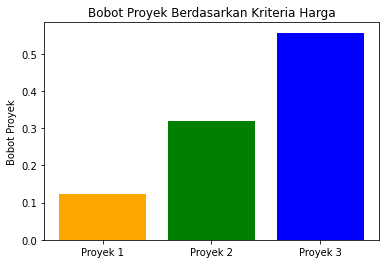

In [24]:
plt.bar(['Proyek 1','Proyek 2','Proyek 3'],[PRICE_P1,PRICE_P2,PRICE_P3], color = ['orange', 'green', 'blue'])
plt.title('Bobot Proyek Berdasarkan Kriteria Harga')
plt.ylabel('Bobot Proyek')

Hasil di atas menunjukkan bahwa Proyek 3, pembelian model Ekonomi, memiliki bobot tertinggi 0.557. Ini berarti jika 3 proyek dianalisis berdasarkan kriteria Harga saja, Proyek 3 akan menjadi kandidat terbaik untuk diseleksi.

### Kriteria MPG 

In [25]:
MPG_dic = {'MPG': ['Proyek 1','Proyek 2','Proyek 3'],
                 'Proyek 1': [1,4,6],
                 'Proyek 2': [1/4,1,3],
                 'Proyek 3': [1/6,1/3,1,]}

MPG_comparison = pd.DataFrame(MPG_dic).set_index('MPG')

MPG_criteria = MPG_comparison.copy()
for col in ['Proyek 1','Proyek 2','Proyek 3']:
    MPG_criteria[col] = MPG_criteria[col] / MPG_criteria[col].sum()

MPG_P1 = (MPG_criteria['Proyek 1'][0] + MPG_criteria['Proyek 2'][0] + MPG_criteria['Proyek 3'][0])/3
MPG_P2 = (MPG_criteria['Proyek 1'][1] + MPG_criteria['Proyek 2'][1] + MPG_criteria['Proyek 3'][1])/3
MPG_P3 = (MPG_criteria['Proyek 1'][2] + MPG_criteria['Proyek 2'][2] + MPG_criteria['Proyek 3'][2])/3

print(f'Bobot Proyek Berdasarkan Kriteria MPG\n--------------------------------------\nProyek 1 : {MPG_P1:.3f}\nProyek 2 : {MPG_P2:.3f}\nProyek 3 : {MPG_P3:.3f}')

Bobot Proyek Berdasarkan Kriteria MPG
--------------------------------------
Proyek 1 : 0.087
Proyek 2 : 0.274
Proyek 3 : 0.639


Text(0, 0.5, 'Bobot Proyek')

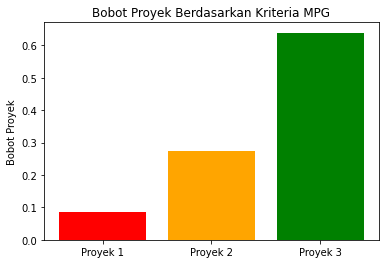

In [27]:
plt.bar(['Proyek 1','Proyek 2','Proyek 3'],[MPG_P1,MPG_P2,MPG_P3], color = ['red', 'orange', 'green'])
plt.title('Bobot Proyek Berdasarkan Kriteria MPG')
plt.ylabel('Bobot Proyek')

Hasil di atas menunjukkan bahwa Proyek 3, pembelian model Ekonomi, memiliki bobot tertinggi 0.639. Ini berarti jika 3 proyek dianalisis berdasarkan kriteria MPG saja, Proyek 3 akan menjadi kandidat terbaik untuk diseleksi.

### Kriteria Kenyamanan

In [28]:
COMFORT_dic = {'KENYAMANAN': ['Proyek 1','Proyek 2','Proyek 3'],
                 'Proyek 1': [1,1/2,1/8],
                 'Proyek 2': [2,1,1/6],
                 'Proyek 3': [8,6,1,]}

COMFORT_comparison = pd.DataFrame(COMFORT_dic).set_index('KENYAMANAN')

COMFORT_criteria = COMFORT_comparison.copy()
for col in ['Proyek 1','Proyek 2','Proyek 3']:
    COMFORT_criteria[col] = COMFORT_criteria[col] / COMFORT_criteria[col].sum()

COMFORT_P1 = (COMFORT_criteria['Proyek 1'][0] + COMFORT_criteria['Proyek 2'][0] + COMFORT_criteria['Proyek 3'][0])/3
COMFORT_P2 = (COMFORT_criteria['Proyek 1'][1] + COMFORT_criteria['Proyek 2'][1] + COMFORT_criteria['Proyek 3'][1])/3
COMFORT_P3 = (COMFORT_criteria['Proyek 1'][2] + COMFORT_criteria['Proyek 2'][2] + COMFORT_criteria['Proyek 3'][2])/3

print(f'Bobot Proyek Berdasarkan Kriteria Kenyamanan\n--------------------------------------\nProyek 1 : {COMFORT_P1:.3f}\nProyek 2 : {COMFORT_P2:.3f}\nProyek 3 : {COMFORT_P3:.3f}')

Bobot Proyek Berdasarkan Kriteria Kenyamanan
--------------------------------------
Proyek 1 : 0.593
Proyek 2 : 0.341
Proyek 3 : 0.065


Text(0, 0.5, 'Bobot Proyek')

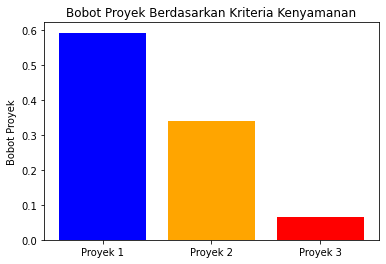

In [30]:
plt.bar(['Proyek 1','Proyek 2','Proyek 3'],[COMFORT_P1,COMFORT_P2,COMFORT_P3], color = ['blue', 'orange', 'red'])
plt.title('Bobot Proyek Berdasarkan Kriteria Kenyamanan')
plt.ylabel('Bobot Proyek')

Hasil di atas menunjukkan bahwa Proyek 1, pembelian model Eksekutif, memiliki bobot tertinggi sebesar 0.593. Ini berarti jika 3 proyek dianalisis berdasarkan kriteria Kenyamanan saja, Proyek 1 akan menjadi kandidat terbaik untuk diseleksi.

### Kriteria Gaya

In [31]:
STYLE_dic = {'GAYA': ['Proyek 1','Proyek 2','Proyek 3'],
                 'Proyek 1': [1,3,1/4],
                 'Proyek 2': [1/3,1,1/7],
                 'Proyek 3': [4,7,1,]}

STYLE_comparison = pd.DataFrame(STYLE_dic).set_index('GAYA')

STYLE_criteria = STYLE_comparison.copy()
for col in ['Proyek 1','Proyek 2','Proyek 3']:
    STYLE_criteria[col] = STYLE_criteria[col] / STYLE_criteria[col].sum()

STYLE_P1 = (STYLE_criteria['Proyek 1'][0] + STYLE_criteria['Proyek 2'][0] + STYLE_criteria['Proyek 3'][0])/3
STYLE_P2 = (STYLE_criteria['Proyek 1'][1] + STYLE_criteria['Proyek 2'][1] + STYLE_criteria['Proyek 3'][1])/3
STYLE_P3 = (STYLE_criteria['Proyek 1'][2] + STYLE_criteria['Proyek 2'][2] + STYLE_criteria['Proyek 3'][2])/3

print(f'Bobot Proyek Berdasarkan Kriteria Gaya\n--------------------------------------\nProyek 1 : {STYLE_P1:.3f}\nProyek 2 : {STYLE_P2:.3f}\nProyek 3 : {STYLE_P3:.3f}')

Bobot Proyek Berdasarkan Kriteria Gaya
--------------------------------------
Proyek 1 : 0.265
Proyek 2 : 0.656
Proyek 3 : 0.080


Text(0, 0.5, 'Bobot Proyek')

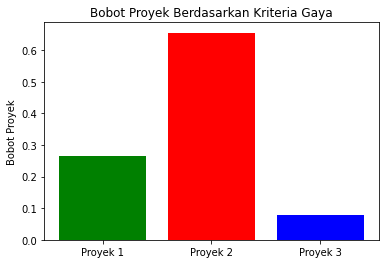

In [33]:
plt.bar(['Proyek 1','Proyek 2','Proyek 3'],[STYLE_P1,STYLE_P2,STYLE_P3], color = ['green', 'red', 'blue'])
plt.title('Bobot Proyek Berdasarkan Kriteria Gaya')
plt.ylabel('Bobot Proyek')

Hasil di atas menunjukkan bahwa Proyek 2, pembelian model Medium, memiliki bobot tertinggi 0.656. Ini berarti jika 3 proyek dianalisis berdasarkan kriteria Gaya saja, Proyek 2 akan menjadi kandidat terbaik untuk diseleksi.

### Keempat Kriteria

In [43]:
Project_1 = Price_weight*PRICE_P1 + Comfort_weight*COMFORT_P1 + MPG_weight*MPG_P1 + Style_weight*STYLE_P1
Project_2 = Price_weight*PRICE_P2 + Comfort_weight*COMFORT_P2 + MPG_weight*MPG_P2 + Style_weight*STYLE_P2
Project_3 = Price_weight*PRICE_P3 + Comfort_weight*COMFORT_P3 + MPG_weight*MPG_P3 + Style_weight*STYLE_P3

print(f'Bobot Proyek Berdasarkan 4 Kriteria\n--------------------------------------\nProyek 1 : {Project_1:.3f}\nProyek 2 : {Project_2:.3f}\nProyek 3 : {Project_3:.3f}')

Bobot Proyek Berdasarkan 4 Kriteria
--------------------------------------
Proyek 1 : 0.265
Proyek 2 : 0.421
Proyek 3 : 0.314


Text(0, 0.5, 'Bobot Proyek')

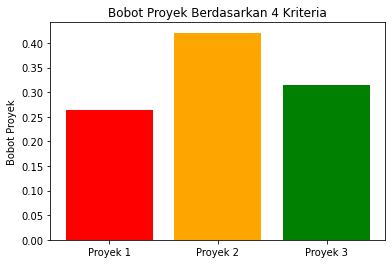

In [44]:
plt.bar(['Proyek 1','Proyek 2','Proyek 3'],[Project_1,Project_2,Project_3], color = ['red', 'orange', 'green'])
plt.title('Bobot Proyek Berdasarkan 4 Kriteria')
plt.ylabel('Bobot Proyek')

### Keputusan Akhir

Hasil akhir di atas menunjukkan bahwa proyek terbaik berdasarkan kombinasi keempat kriteria adalah Proyek 2, pembelian model Medium.